In [1]:
import torch
import pathlib
from Loaders import Importer
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import numpy as np

from src.thermometer_encoding import Thermometer
from src.utils import plot_thermometer_demonstration, real_vs_therm_comparison

%matplotlib widget

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Paths to datasets

In [2]:
load_path = pathlib.Path("./00_demonstrations_data/datasets")

disorderless_ds_path = load_path.joinpath("disorderless")
disordered_001_ds_path = load_path.joinpath("disordered_W=0.01")
disordered_005_ds_path = load_path.joinpath("disordered_W=0.05")
disordered_015_ds_path = load_path.joinpath("disordered_W=0.15")
disordered_050_ds_path = load_path.joinpath("disordered_W=0.5")
disordered_100_ds_path = load_path.joinpath("disordered_W=1.0")
disordered_200_ds_path = load_path.joinpath("disordered_W=2.0")

Here is a sample of what does thermometer-encoded data look like:

In [3]:
levels = 15

ds = Importer(disordered_100_ds_path, -1)
test_loader = ds.get_test_loader()

data_sample = ds.test_data[20]

data_sample = torch.from_numpy(data_sample).float().reshape([1, 1, 50, 50])

therm = Thermometer(data_sample, levels)

therm = therm.reshape([50, 50, levels])

print(f"Shape of the initial data sample: {data_sample.squeeze().shape} | Shape after thermometer encoding: {therm.squeeze().shape}")

Shape of the initial data sample: torch.Size([50, 50]) | Shape after thermometer encoding: torch.Size([50, 50, 15])


We have succesfuly performed a transformation: `float` $\to$ `vector`. Here is a widget allowing to investigate this.

In [4]:
interact(
    real_vs_therm_comparison, 
    therm=fixed(therm),
    data_sample=fixed(data_sample),
    levels=fixed(levels),
    eigenstate_no=(0, 50, 1),
    fs=fixed(15)
)

interactive(children=(IntSlider(value=25, description='eigenstate_no', max=50), Output()), _dom_classes=('widg…

<function src.utils.real_vs_therm_comparison(therm, data_sample, levels=15, eigenstate_no=25, fs=15)>

Let's also have a look at a whole pipeline, as sumamrized on the figure below:

In [5]:
thermometer_levels = 15
chosen_level = 3
img_ind = 20

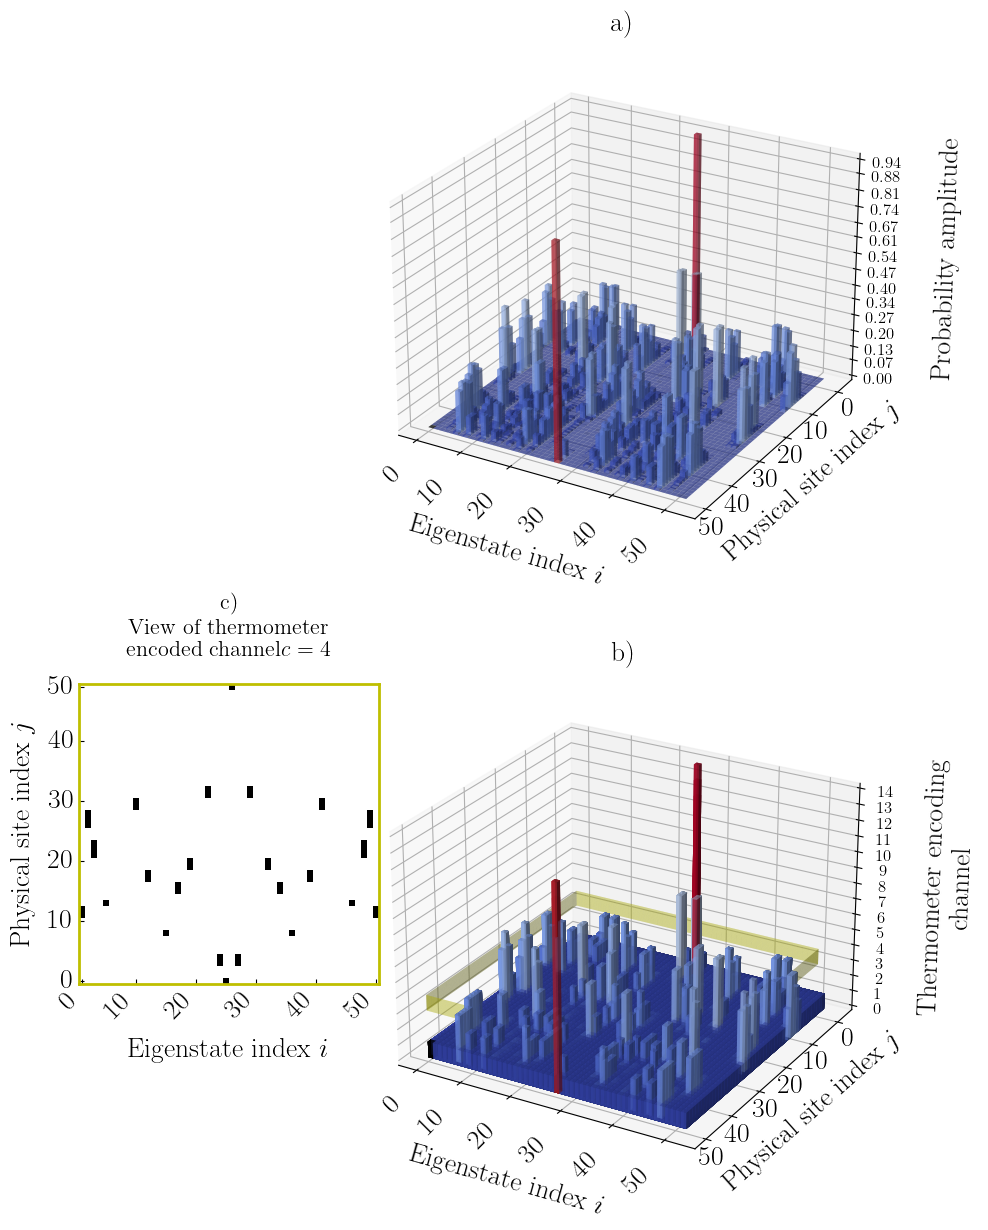

In [6]:
%matplotlib inline
plot_thermometer_demonstration(ds, img_ind, levels, chosen_level)

a) We start with a real-valued data sample.  
b) Then, we discretize it into `levels` number of binary channels.  
c) Each channel is `50 x 50` large, with binary values.
